In [15]:
import glob
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from scipy.stats import gaussian_kde
import seaborn as sns
import re

import importlib
import toylosses
importlib.reload(toylosses)
import toynn
importlib.reload(toynn)
import toyvis
importlib.reload(toyvis)

import torch
sns.set()

DEVICE = 'cuda'
OUTPUT = '/scratch/users/nmiolane/toyoutput'

# Decide on experiment's configuration

(-35.45901743847549, 35.07994011318854, -6.574045953607253, 3.9237758036696855)

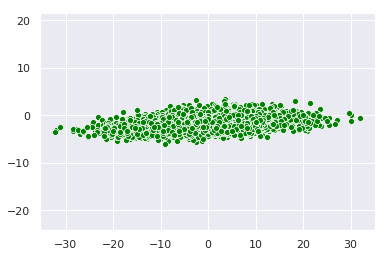

In [58]:
DATA_DIM = 2
LATENT_DIM = 1
N_DECODER_LAYERS = 2
NONLINEARITY = False
N_SAMPLES = 10000
WITH_BIASX = True
WITH_LOGVARX = True

W_TRUE = {}
B_TRUE = {}

W_TRUE[0] = [[1.], [1.]]
B_TRUE[0] = [0., -1.]

# For the reconstruction
W_TRUE[1] = [[2., 1.], [-1., 2.]]
B_TRUE[1] = [0., 0.]

# For the logvarx
W_TRUE[2] = [[1., -1.], [0., 1.]]
B_TRUE[2] = [3., -1.]

if WITH_LOGVARX:
    assert len(W_TRUE) == N_DECODER_LAYERS + 1
else:
    assert len(W_TRUE) == N_DECODER_LAYERS

WITH_BIASZ = True
WITH_LOGVARZ = True

decoder_true = toynn.make_decoder_true(
    w_true=W_TRUE, b_true=B_TRUE, latent_dim=LATENT_DIM, 
    data_dim=DATA_DIM, n_layers=N_DECODER_LAYERS,
    nonlinearity=NONLINEARITY, with_biasx=WITH_BIASX, with_logvarx=WITH_LOGVARX)

generated_true_x = toynn.generate_from_decoder(decoder_true, N_SAMPLES)

fig, ax = plt.subplots()
ax = toyvis.plot_data(generated_true_x, color='green', label='from decoder true', ax=ax)
ax.axis('equal')

# Inspect generation of synthetic data from decoder_true

In [59]:
decoder_true_path = glob.glob(f'{OUTPUT}/synthetic/decoder_true.pth')[0]
decoder_true = torch.load(decoder_true_path, map_location=DEVICE)

for name, param in decoder_true.named_parameters():
    print(name, param.data, '\n')

layers.0.weight tensor([[1.],
        [1.]], device='cuda:0') 

layers.0.bias tensor([ 0., -1.], device='cuda:0') 

layers.1.weight tensor([[ 2.,  1.],
        [-1.,  2.]], device='cuda:0') 

layers.1.bias tensor([0., 0.], device='cuda:0') 

layers.2.weight tensor([[ 1., -1.],
        [ 0.,  1.]], device='cuda:0') 

layers.2.bias tensor([ 3., -1.], device='cuda:0') 



In [60]:
# TODO(nina): Add a comparison to a FA?

# Inspect results from standard VAE

-- True values of parameters
layers.0.weight tensor([[1.],
        [1.]], device='cuda:0') 

layers.0.bias tensor([ 0., -1.], device='cuda:0') 

layers.1.weight tensor([[ 2.,  1.],
        [-1.,  2.]], device='cuda:0') 

layers.1.bias tensor([0., 0.], device='cuda:0') 

layers.2.weight tensor([[ 1., -1.],
        [ 0.,  1.]], device='cuda:0') 

layers.2.bias tensor([ 3., -1.], device='cuda:0') 


-- Learnt values of parameters
layers.0.weight tensor([[-0.4043],
        [-0.2794]], device='cuda:0') 

layers.0.bias tensor([ 0.0440, -0.8985], device='cuda:0') 

layers.1.weight tensor([[-0.7276, -0.0537],
        [-0.5463,  0.7060]], device='cuda:0') 

layers.1.bias tensor([-0.8899, -1.4534], device='cuda:0') 

layers.2.weight tensor([[ 0.8270, -1.3013],
        [-0.4685,  0.6545]], device='cuda:0') 

layers.2.bias tensor([0.2127, 0.6712], device='cuda:0') 

Last losses:
[1.5386065254211425, 1.511280706167221, 1.48375474524498, 1.4556800575256348, 1.4264577593803405]


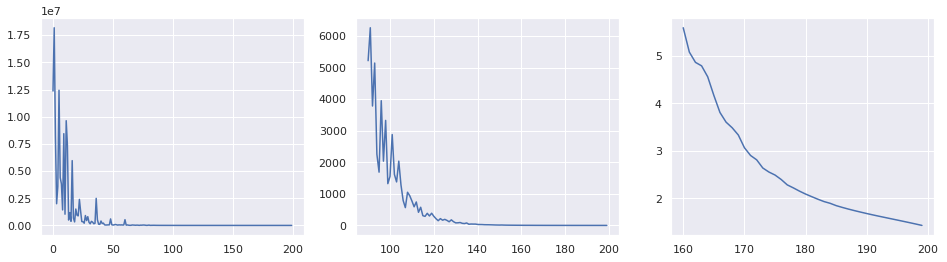

In [70]:
decoder_true_path = glob.glob(f'{OUTPUT}/synthetic/decoder_true.pth')[0]
decoder_true = torch.load(decoder_true_path, map_location=DEVICE)

decoder_path = glob.glob(f'{OUTPUT}/train_vae/models/decoder.pth')[0]
decoder = torch.load(decoder_path, map_location=DEVICE)

print('-- True values of parameters')
for name, param in decoder_true.named_parameters():
    print(name, param.data, '\n')

print('\n-- Learnt values of parameters')
for name, param in decoder.named_parameters():
    print(name, param.data, '\n')
    
losses_vae_path = glob.glob(f'{OUTPUT}/train_vae/train_losses.pkl')[0]
train_losses_all_epochs = pickle.load(open(losses_vae_path, 'rb'))

train_losses_total = [loss['total'] for loss in train_losses_all_epochs]
n_epochs = len(train_losses_total)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

ax = axes[0]
ax.plot(range(n_epochs), train_losses_total)

ax = axes[1]
ax.plot(range(90, n_epochs), train_losses_total[90:])

ax = axes[2]
ax.plot(range(160, n_epochs), train_losses_total[160:])

print('Last losses:')
print(train_losses_total[-5:])

(-29.84966039848803, 24.673002678067412, -6.089774284066346, 2.665690821115047)

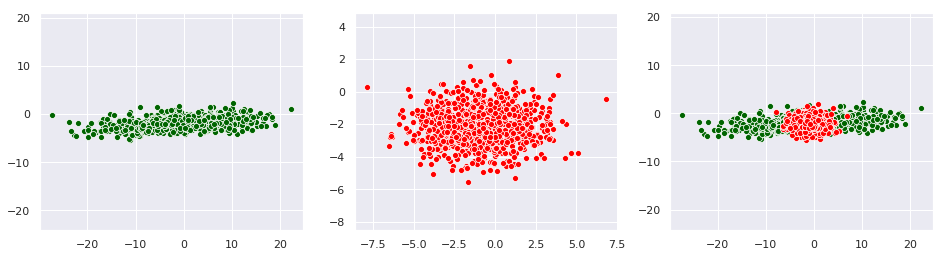

In [62]:
n_samples = 1000
generated_true_x = toynn.generate_from_decoder(decoder_true, n_samples)
generated_x = toynn.generate_from_decoder(decoder, n_samples)

# For 1D
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))
axis_side = 20

ax = axes[0]
toyvis.plot_data(generated_true_x, color='darkgreen', ax=ax)
ax.axis('equal')

ax = axes[1]
toyvis.plot_data(generated_x, color='red', ax=ax)
ax.axis('equal')

ax = axes[2]
toyvis.plot_data(generated_true_x, color='darkgreen', ax=ax)
toyvis.plot_data(generated_x, color='red', ax=ax)
ax.axis('equal')

# Inspect results from VEM

-- True values of parameters
layers.0.weight tensor([[1.],
        [1.]], device='cuda:0') 

layers.0.bias tensor([ 0., -1.], device='cuda:0') 

layers.1.weight tensor([[ 2.,  1.],
        [-1.,  2.]], device='cuda:0') 

layers.1.bias tensor([0., 0.], device='cuda:0') 

layers.2.weight tensor([[ 1., -1.],
        [ 0.,  1.]], device='cuda:0') 

layers.2.bias tensor([ 3., -1.], device='cuda:0') 


-- Learnt values of parameters
layers.0.weight tensor([[-0.2193],
        [-0.1899]], device='cuda:0') 

layers.0.bias tensor([ 0.5845, -1.3090], device='cuda:0') 

layers.1.weight tensor([[ 0.7279,  0.5505],
        [-0.8447,  0.5077]], device='cuda:0') 

layers.1.bias tensor([-0.6466, -0.8168], device='cuda:0') 

layers.2.weight tensor([[ 0.2010, -0.4003],
        [ 0.3128, -0.6565]], device='cuda:0') 

layers.2.bias tensor([-0.1202, -0.0849], device='cuda:0') 

Last losses:
[0.7177514861822129, 0.7156790163516998, 0.7181191428899765, 0.7165926012992859, 0.7155657385587693]


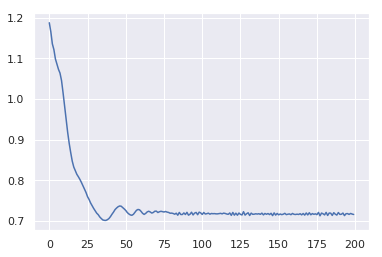

In [71]:
decoder_true_path = glob.glob(f'{OUTPUT}/synthetic/decoder_true.pth')[0]
decoder_true = torch.load(decoder_true_path, map_location=DEVICE)

decoder_path = glob.glob(f'{OUTPUT}/train_vem/models/decoder.pth')[0]
decoder = torch.load(decoder_path, map_location=DEVICE)

print('-- True values of parameters')
for name, param in decoder_true.named_parameters():
    print(name, param.data, '\n')

print('\n-- Learnt values of parameters')
for name, param in decoder.named_parameters():
    print(name, param.data, '\n')
    
losses_vae_path = glob.glob(f'{OUTPUT}/train_vem/train_losses.pkl')[0]
train_losses_all_epochs = pickle.load(open(losses_vae_path, 'rb'))

plt.figure()
train_losses_total = [loss['total'] for loss in train_losses_all_epochs]
n_epochs = len(train_losses_total)
plt.plot(range(n_epochs), train_losses_total)
print('Last losses:')
print(train_losses_total[-5:])

(-28.347982306500587, 29.17848519131388, -7.052893099222922, 3.78542406816151)

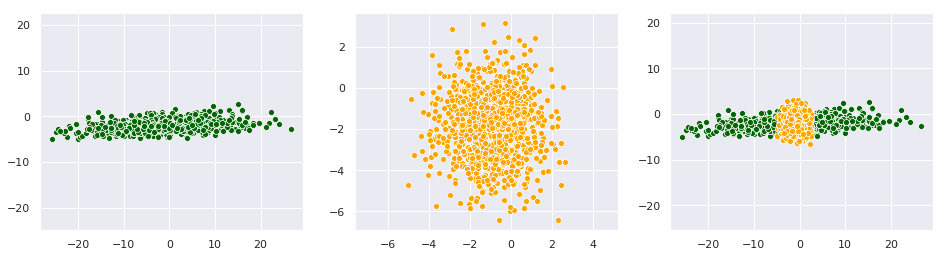

In [72]:
n_samples = 1000
generated_true_x = toynn.generate_from_decoder(decoder_true, n_samples)
generated_x = toynn.generate_from_decoder(decoder, n_samples)

# For 1D
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))
axis_side = 20

ax = axes[0]
toyvis.plot_data(generated_true_x, color='darkgreen', ax=ax)
ax.axis('equal')

ax = axes[1]
toyvis.plot_data(generated_x, color='orange', ax=ax)
ax.axis('equal')

ax = axes[2]
toyvis.plot_data(generated_true_x, color='darkgreen', ax=ax)
toyvis.plot_data(generated_x, color='orange', ax=ax)
ax.axis('equal')

# Print pipeline logs

In [73]:
pattern = 'logs'
logs = []
for filename in os.listdir(OUTPUT):
    if re.search(pattern, filename):
        logs.append(filename)

print('Found %d log files.' % len(logs))
        
for filename in logs:
    path = os.path.join(OUTPUT, filename)
    print('\n-- Log file: %s\n' % filename)
    with open(path, 'r') as f:
        message = f.read()
    print(message)

Found 3 log files.

-- Log file: logs2019-04-09 22:40:55.655206.txt

2019-04-09 22:40:55,655 root         INFO     start
2019-04-09 22:40:55,670 luigi        INFO     logging configured by default settings
2019-04-09 22:40:55,674 luigi-interface DEBUG    Checking if RunAll() is complete
2019-04-09 22:40:55,675 luigi-interface DEBUG    Checking if TrainVAE() is complete
2019-04-09 22:40:55,675 luigi-interface DEBUG    Checking if TrainVEM() is complete
2019-04-09 22:40:55,675 luigi-interface INFO     Informed scheduler that task   RunAll__99914b932b   has status   PENDING
2019-04-09 22:40:55,676 luigi-interface INFO     Informed scheduler that task   TrainVEM__99914b932b   has status   DONE
2019-04-09 22:40:55,676 luigi-interface DEBUG    Checking if MakeDataSet() is complete
2019-04-09 22:40:55,677 luigi-interface INFO     Informed scheduler that task   TrainVAE__99914b932b   has status   PENDING
2019-04-09 22:40:55,677 luigi-interface INFO     Informed scheduler that task   MakeDataSe